In [40]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree

In [41]:
dt = pd.read_csv("Hosotd_Data.csv")
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Level      15 non-null     object
 1   Job        15 non-null     object
 2   N_Company  15 non-null     int64 
 3   Top_Train  15 non-null     object
 4   Project    15 non-null     object
 5   Result     15 non-null     object
dtypes: int64(1), object(5)
memory usage: 848.0+ bytes


In [42]:
dt.head()

,Level,Job,N_Company,Top_Train,Project,Result
0,Dai hoc,Co,2,Khong,Khong,Khong
1,Dai hoc,Khong,1,Co,Co,Co
2,Cao dang,Khong,4,Khong,Khong,Khong
3,Dai hoc,Co,1,Co,Khong,Co
4,Dai hoc,Co,2,Co,Khong,Co


In [43]:
# Định nghĩa một từ điển để ánh xạ các cấp độ giáo dục với các giá trị số tương ứng
convert_data_level = {'Dai hoc': 0, 'Cao dang': 1, 'Trung tam tin hoc': 2}

# Ánh xạ giá trị của cột 'Level' trong DataFrame 'dt' bằng cách sử dụng từ điển 'convert_data_level'
dt['Level'] = dt['Level'].map(convert_data_level)

# Định nghĩa một từ điển để ánh xạ 'Co' và 'Khong' với các giá trị 1 và 0 tương ứng
convert_data = {'Co': 1, 'Khong': 0}

# Ánh xạ giá trị của các cột 'Result', 'Top_Train', 'Project', và 'Job' trong DataFrame 'dt' bằng cách sử dụng từ điển 'convert_data'
dt['Result'] = dt['Result'].map(convert_data)
dt['Top_Train'] = dt['Top_Train'].map(convert_data)
dt['Project'] = dt['Project'].map(convert_data)
dt['Job'] = dt['Job'].map(convert_data)

# Hiển thị 5 hàng đầu tiên của DataFrame 'dt' sau khi đã chuyển đổi
dt.head()


,Level,Job,N_Company,Top_Train,Project,Result
0,0,1,2,0,0,0
1,0,0,1,1,1,1
2,1,0,4,0,0,0
3,0,1,1,1,0,1
4,0,1,2,1,0,1


In [44]:
properties_tree = list(dt.columns[:5])
properties_tree

['Level', 'Job', 'N_Company', 'Top_Train', 'Project']

In [45]:
axis_X = dt[['Job', 'N_Company', 'Top_Train', 'Project']]
axis_y = dt[['Result']]

In [46]:

# Khởi tạo mô hình DecisionTreeClassifier với tiêu chí entropy 
ml_tree = tree.DecisionTreeClassifier(criterion='entropy')
ml_tree.fit(axis_X, axis_y)

DecisionTreeClassifier(criterion='entropy')

In [47]:
feature_x = ['Level', 'N_Company', 'Job', 'Top_train', 'Project']
target_y = ['1: Có', '0: Không']

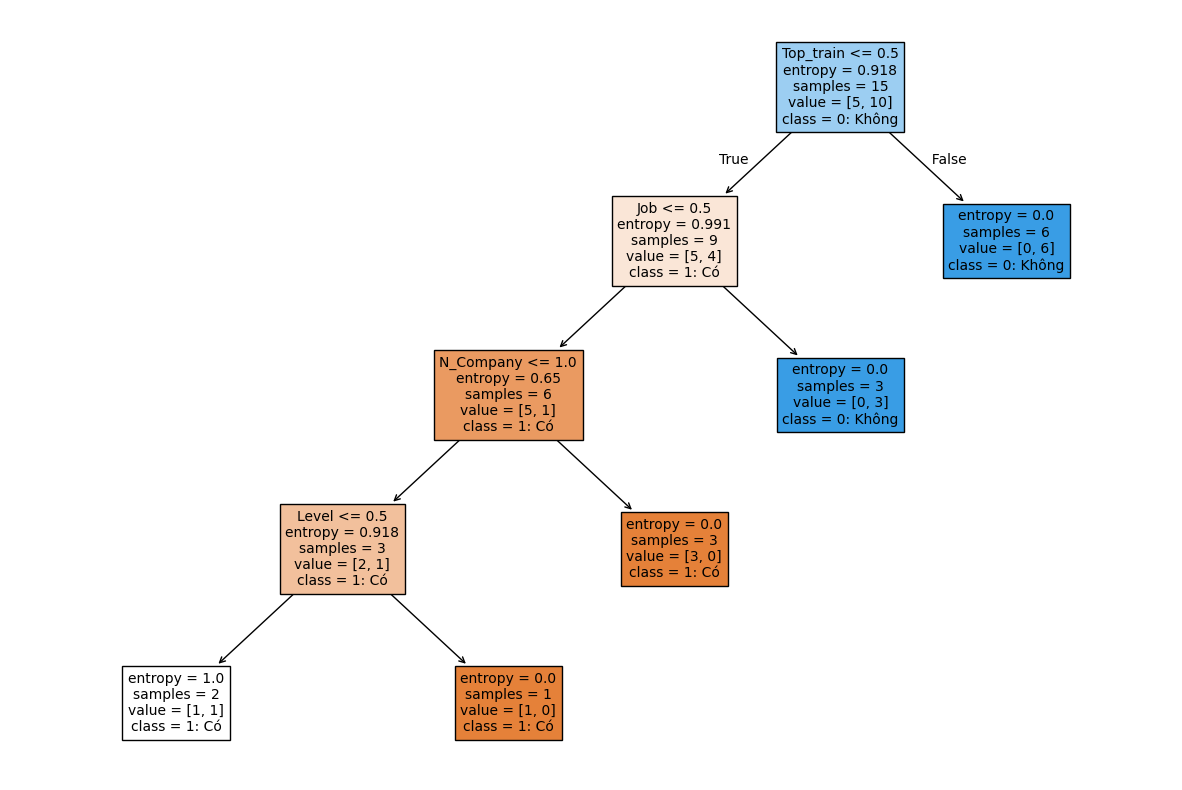

In [48]:
# Tạo một hình với kích thước 15x10 inch
fig = plt.figure(figsize=(15,10))

# Vẽ cây quyết định sử dụng hàm plot_tree từ thư viện tree trong sklearn
# feature_names: Danh sách tên của các đặc trưng (biến độc lập)
# class_names: Danh sách tên của các lớp (biến phụ thuộc)
# filled: Chỉ định liệu cây có được tô màu hay không
# fontsize: Cỡ chữ cho các nút trong cây
tree.plot_tree(ml_tree, feature_names=feature_x,
               class_names=target_y,
               filled=True, fontsize=10)

# Hiển thị hình với cây quyết định
plt.show()
